<h1>Building a Simple Search Engine: K-Means Text Clustering Using TF-IDF Weighting</h1>
<p>
Start by loading in the necessary libraries and the text of the Grimm Fairy Tales (<a href="https://www.cs.cmu.edu/~spok/grimmtmp/">source</a>).
</p>

In [2]:
import pickle
import numpy as np

Tales = pickle.load(open('Grimm.pkl', 'rb'))
Titles = [title for title in Tales]
# Tales is structed as a nested dictionary:
#   Tales:
#     "Cinderella": 
#          "text": ["There", "once", "was", ...]
#          ...


<h1>Bag of Words</h1>
Clean and split the raw text blocks  into words. Because we do not want to treat roots and derived words (e.g. 'dog' and 'dogs') as seperate, we need to reduce all words to their root form using a lemmatizer. You can read more about lemmatization <a href="https://nlp.stanford.edu/IR-book/html/htmledition/stemming-and-lemmatization-1.html">here</a>.

In [3]:
import nltk
nltk.download('wordnet')
from nltk.stem import WordNetLemmatizer
lemmatizer = WordNetLemmatizer() 

def toBoW(rawText):
    #TODO: remove non-words characters ,.?!/\"() etc.
    BoW = rawText.translate(str.maketrans("", "", '",.?!/\\()'))
    #TODO: Cast string to lower case. Think: is this always correct? (hint: look into NER)
    BoW = BoW.lower()
    #TODO: split text into words
    BoW = BoW.split(' ')
    
    
    #TODO: use the NLTK lemmatizer's lemmatize() function to reduce each word to it's root
    BoW = [lemmatizer.lemmatize(word) for word in BoW]
    return BoW

for title in Tales:
    Tales[title]["text"] = toBoW(Tales[title]["text"])
    

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\manderson\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


<h1 style="margin-top: 0px;">TF-IDF</h1>
<h2  style="margin-top: 5px; margin-bottom: 5px; margin-left: 20px;">Step 1</h2>
Build a list of all terms and their frequencies

In [4]:
termIDFs = {}

for title in Tales:
    for word in Tales[title]["text"]:
        
        #TODO: add term if not in termlist
        if word not in termIDFs:
            termIDFs[word] = 1
        #TODO: increment term count
        else:
            termIDFs[word] += 1
            
#TODO: calculate document frequency
for word in termIDFs:
    termIDFs[word] = np.log(len(Titles) / termIDFs[word])

#TODO: create and order term list
termList = [word for word in termIDFs]
#TODO: create IDF vector
IDFVector = np.array([termIDFs[word] for term in termList])

<h2  style="margin-top: 5px; margin-bottom: 5px; margin-left: 20px;">Step 2</h2>
For each document, compute each terms' frequency and store it in a frequency vector

In [5]:
def calcTFVec(document, featureList):
    #TODO: initialize feature vector
    frequencyVector = np.array([0 for _ in featureList])
        
    for word in document:
        if word in featureList:
            #TODO: update term count
            frequencyVector[featureList.index(word)] += 1
        
    #TODO: calculate term frequency
    frequencyVector = frequencyVector / len(document)
        
    return frequencyVector

        
for title in Tales:
    Tales[title]["freq"] = calcTFVec(Tales[title]["text"], termList)
    

<h2  style="margin-top: 5px; margin-bottom: 5px; margin-left: 20px;">Step 3</h2>
Update the term frequencies by their combined document frequencies

In [6]:
for title in Tales:
    #TODO: set term frequency
    Tales[title]["freq"] = Tales[title]["freq"] / IDFVector

<h1 style="margin-top: 0px;">K Means</h1>
Run the K-Means algorithm on the document feature vectors to build document clusters

In [20]:
from sklearn.cluster import KMeans

def buildClusters(numClusters):
    #TODO: build the feature vector
    featureVectors = [Tales[title]["freq"] for title in Tales]
    model = KMeans(n_clusters=numClusters, random_state=140)
    model.fit(featureVectors)
    
    predictions = model.predict(featureVectors)
    clusters = {
                #TODO build document list
                centerNumber: [Titles[i] for i in range(len(Titles)) if predictions[i] == centerNumber]
                for centerNumber in predictions}
    return model, clusters

<h1 style="margin-top: 0px;">Query the Documents</h1>
Use TF weighted queries to select the nearest cluster of documents

In [21]:
def query(question, model, clusters):
    #TODO: calculate the question's feature vector
    questionVec = calcTFVec(question, termList)
        
    # TODO: use the model to predict the most relevant cluster
    pred = model.predict([questionVec])
    relevantTitles =clusters[pred[0]]
    return relevantTitles
        

<h1 style="margin-top: 0px;">Test the Results</h1>
Run preselected queries on the documents using different cluster sizes and graph the results

___________________Testing K = 2___________________
___________________Testing K = 3___________________
___________________Testing K = 4___________________
___________________Testing K = 5___________________
___________________Testing K = 6___________________
___________________Testing K = 7___________________
___________________Testing K = 8___________________
___________________Testing K = 9___________________
___________________Testing K = 10___________________
___________________Testing K = 11___________________
___________________Testing K = 12___________________
___________________Testing K = 13___________________
___________________Testing K = 14___________________


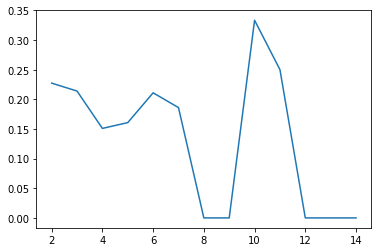

In [22]:
groundTruth = [title for title in Tales if 'hair' in Tales[title]['text']]
x = []
y = []

for K in [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14]:
    print('___________________Testing K = %i___________________' %K)
    model, clusters = buildClusters(K)
    
    answer = query("What stories are about hair?", model, clusters)
    x.append(K)
    y.append(len([title for title in groundTruth if title in answer])/len(answer))
    
import matplotlib.pyplot as plt
plt.plot(x, y)
plt.show()